In [1]:
# imports 
import pandas as pd
import plotly.offline as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
import plotly.figure_factory as ff 


In [2]:
# import data files
df = pd.read_csv('/Users/sumedtamang/Documents/Projects/gander_pay_diff/Glassdoor_Gender_Pay_Gap.csv')

In [3]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
# splitting male and female 
f_df = df[df['Gender'] == 'Female'].loc[:,['BasePay','JobTitle','Education','Seniority']]
m_df = df[df['Gender'] == 'Male'].loc[:,['BasePay','JobTitle','Education','Seniority']]

## Looking at the outliers on the dataset with boxplots

In [6]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [10]:
# ploting the figure
boxF = go.Box(y = f_df.BasePay, name = 'Females', marker= {'color': 'green'})
boxM = go.Box(y = m_df.BasePay, name = 'Males', marker= {'color': 'blue'})

data = [boxF, boxM]

layout = go.Layout(title = 'Differences in Salary Male vs Female', 
titlefont = {'family': 'Arial',
             'size': 22,
             'color': '#7f7f7f'},
xaxis = {'title': 'Gender'},
yaxis = {'title': 'Salary'},
paper_bgcolor = 'rgb(243, 243, 243)',
plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)

In [11]:
# plot 
py.iplot(fig)

In [22]:
def DistPlot(x, color):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    sns.distplot(x, bins=100, color=color)

/Users/sumedtamang/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



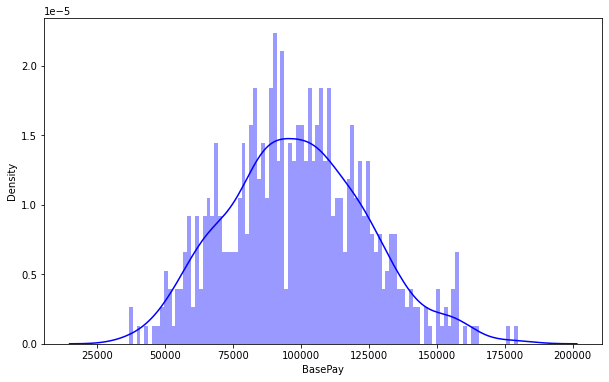

In [24]:
DistPlot(m_df['BasePay'], 'blue')

/Users/sumedtamang/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



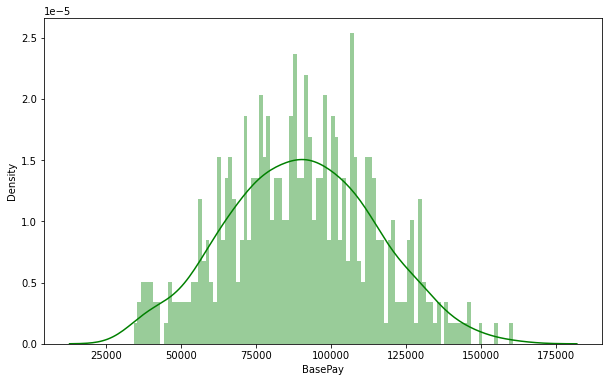

In [25]:
DistPlot(f_df['BasePay'], 'green')

In [26]:
data = [m_df['BasePay'], f_df['BasePay']]

group_labels = ['Male', 'Female']
colors = ['blue', 'green']

# create a distplot with curve_type set to 'normal'
fig = ff.create_distplot(data, group_labels, show_hist=False, colors=colors)

# add title
fig.update_layout(title_text='symmetry')
fig.show()

In [27]:
# sorting values 
f_df.sort_values(by=['BasePay'], inplace=True)
m_df.sort_values(by=['BasePay'], inplace=True)

m_df['BasePay'].iloc[-2:] # get the last 2 rows

353    176789
927    179726
Name: BasePay, dtype: int64

In [28]:
f_df['BasePay'].iloc[-2:]

327    155203
357    160614
Name: BasePay, dtype: int64

In [29]:
f_df = f_df.drop([357]) # dropping outlier
m_df = m_df.drop([927, 353]) # dropping outlier

In [32]:
m_df.describe()

,BasePay,Seniority
count,530.000000,530.000000
mean,98156.413208,2.928302
std,25088.461328,1.398943
min,36642.000000,1.000000
25%,81351.500000,2.000000
50%,98132.500000,3.000000
75%,115466.500000,4.000000
max,165229.000000,5.000000


## Pre-processing and Exploration

In [33]:
f_df.head()

,BasePay,JobTitle,Education,Seniority
465,34208,Marketing Associate,High School,2
348,36548,Marketing Associate,PhD,1
824,36585,Marketing Associate,High School,1
590,36972,Marketing Associate,High School,2
266,37026,Warehouse Associate,High School,1


In [34]:
f_df.describe()

,BasePay,Seniority
count,467.000000,467.000000
mean,89791.488223,3.012848
std,24183.365284,1.391207
min,34208.000000,1.000000
25%,73066.500000,2.000000
50%,89822.000000,3.000000
75%,106852.000000,4.000000
max,155203.000000,5.000000


In [35]:
m_df.describe()

,BasePay,Seniority
count,530.000000,530.000000
mean,98156.413208,2.928302
std,25088.461328,1.398943
min,36642.000000,1.000000
25%,81351.500000,2.000000
50%,98132.500000,3.000000
75%,115466.500000,4.000000
max,165229.000000,5.000000


In [36]:
# job titles in the dataset 
df.JobTitle.value_counts()

Marketing Associate    118
Software Engineer      109
Data Scientist         107
Financial Analyst      107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

In [37]:
df.Gender.value_counts()

Male      532
Female    468
Name: Gender, dtype: int64

In [38]:
df.Education.value_counts()

High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

In [39]:
df.Dept.value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

In [40]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [43]:

fig = px.scatter(df, x="Age", y="BasePay", trendline="ols")
fig.show()

In [75]:
#fig = px.bar(f_df, x='BasePay', y='JobTitle')
#fig.show()

Text(0.5, 1.02, 'Job Distribution of Females')

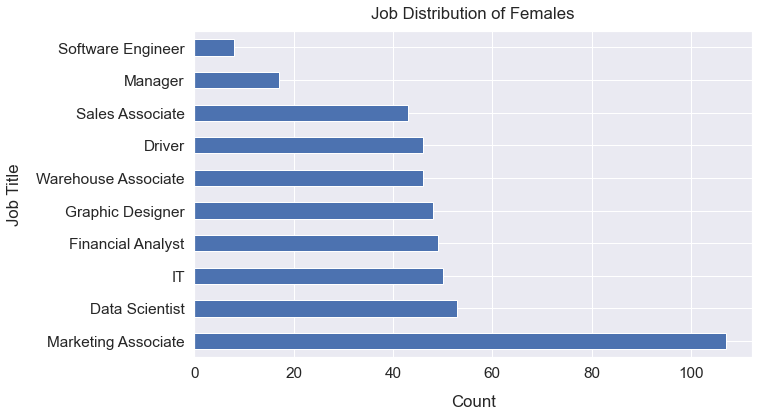

In [74]:
sns.set(font_scale=1.4)
f_df.JobTitle.value_counts().plot(kind='barh', figsize=(10,6), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Job Title", labelpad=14)
plt.title("Job Distribution of Females", y=1.02)

Text(0.5, 1.02, 'Job Distribution of Males')

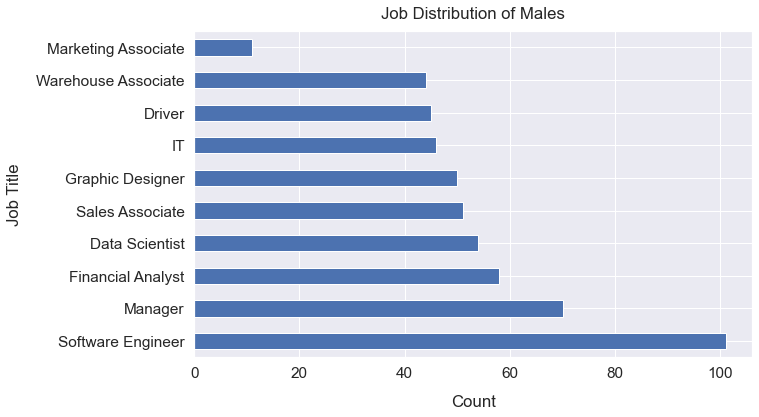

In [73]:
sns.set(font_scale=1.4)
m_df.JobTitle.value_counts().plot(kind='barh', figsize=(10,6), rot=0)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Job Title", labelpad=14)
plt.title("Job Distribution of Males", y=1.02)

In [76]:
# Count gender per Job titles
gender_jobs = df.groupby(['JobTitle','Gender']).size().reset_index(name='counts')
gender_jobs.head()

,JobTitle,Gender,counts
0,Data Scientist,Female,53
1,Data Scientist,Male,54
2,Driver,Female,46
3,Driver,Male,45
4,Financial Analyst,Female,49


In [95]:
# ploting gender per job titles
fig = px.bar(gender_jobs, x='JobTitle', y='counts', color='Gender', barmode='group', title='Gender & Jobs')
fig.show()

In [91]:
f_df.head()

,BasePay,JobTitle,Education,Seniority
465,34208,Marketing Associate,High School,2
348,36548,Marketing Associate,PhD,1
824,36585,Marketing Associate,High School,1
590,36972,Marketing Associate,High School,2
266,37026,Warehouse Associate,High School,1


## radarplot exp

In [82]:
x = [i for i in gender_jobs.JobTitle.unique()]
print(x)

['Data Scientist', 'Driver', 'Financial Analyst', 'Graphic Designer', 'IT', 'Manager', 'Marketing Associate', 'Sales Associate', 'Software Engineer', 'Warehouse Associate']


In [88]:
categories = [i for i in gender_jobs.JobTitle.unique()]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[i for i in gender_jobs.counts],
    theta = categories,
    fill = 'toself',
    name = 'Product A',
    #color = [i for i in gender_jobs.Gender]
))

fig.update_layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range=[0,100]
        )
    ),
    showlegend=False
)

fig.show()

## s

In [96]:
# Count gender per Education
edu_jobs = df.groupby(['Education','Gender']).size().reset_index(name='counts')

# ploting gender per Education levels
fig = px.bar(edu_jobs, x='Education', y='counts', color='Gender', barmode='group', title='Gender & Education')
fig.show()

In [97]:
# Exact pay difference 
female = df[df['Gender'] == 'Female'].groupby('JobTitle').sum()
male = df[df['Gender'] == 'Male'].groupby('JobTitle').sum()

In [100]:
title = pd.get_dummies(df, columns=['Gender']).groupby('JobTitle').sum()
female['BasePay'] /= title['Gender_Female'].tolist()
male['BasePay'] /= title['Gender_Male'].tolist()

In [102]:
diff = (male['BasePay'] - female['BasePay']).tolist()
titles = male.index.tolist()

for i in range(len(diff)):
    if diff[i] > 0:
        print('Men make '+ str(int(diff[i])) + ' more than Women as a ' + titles[i])
    else:
        print('Men make '+ str(int(-diff[i])) + ' less than Women as a ' + titles[i])


Men make 6482 less than Women as a Data Scientist
Men make 5085 more than Women as a Driver
Men make 851 less than Women as a Financial Analyst
Men make 2647 less than Women as a Graphic Designer
Men make 546 more than Women as a IT
Men make 2403 less than Women as a Manager
Men make 5762 more than Women as a Marketing Associate
Men make 2768 more than Women as a Sales Associate
Men make 11670 more than Women as a Software Engineer
Men make 5874 less than Women as a Warehouse Associate


In [103]:
fig = go.Figure(data = [
    go.Bar(name='Differences', x=female.index, y=male['BasePay'] - female['BasePay'])
])
fig.update_layout(barmode='group', title='Base Pay [Male-Female]')
fig.show()